# Simulations

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#can use any random seed- lets preset this
np.random.seed(1349) 

#preset the number of simulations we'll have
n_simulations =100_000

<hr style="border:2px solid gray">

### 1. How likely is it that you roll doubles when rolling two dice?
#### Expected?

In [3]:
# Expected probability
2/12

0.16666666666666666

#### Simulate!

In [4]:
#number of dice
number_of_dice = 2 
outcomes = [1,2,3,4,5,6]

In [5]:
rolls = np.random.choice(outcomes, size=(n_simulations, number_of_dice))
rolls

array([[3, 2],
       [5, 3],
       [4, 4],
       ...,
       [3, 5],
       [2, 4],
       [4, 5]])

In [6]:
#let's turn this into a dataframe so we can see our outcomes more clearly
rolls =pd.DataFrame(rolls)

#call our new dataframe
rolls.head()

,0,1
0,3,2
1,5,3
2,4,4
3,6,2
4,1,1


In [7]:
#the average likelyhood that roll in index 0 will equal roll in index 1
(rolls[0] == rolls[1]).mean()

0.16445

<hr style="border:1.5px solid black">

### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

#### Expected 

In [8]:
3/16

0.1875

#### Simulated

In [9]:
#number of coins
n_coins = 8 

#possible outcomes
outcomes = ['H', 'T']

In [10]:
#us random choice to get the simulation
coinflips = np.random.choice(outcomes, size=(n_simulations, n_coins))

#call the variable
coinflips

array([['T', 'H', 'T', ..., 'H', 'T', 'T'],
       ['T', 'H', 'T', ..., 'H', 'H', 'H'],
       ['T', 'T', 'T', ..., 'H', 'T', 'T'],
       ...,
       ['T', 'T', 'H', ..., 'H', 'H', 'T'],
       ['H', 'H', 'H', ..., 'T', 'H', 'T'],
       ['T', 'H', 'H', ..., 'H', 'H', 'T']], dtype='<U1')

In [11]:
#let's look at the possibility of the coinflip being Heads
flips_by_sim = (coinflips == 'H').sum(axis=1)

#call that variable
flips_by_sim

array([3, 4, 1, ..., 3, 4, 5])

##### Landing on Heads exactly 3 times

In [12]:
#what is the possibility of the flips being heads exactly 3 times
flips_by_sim == 3

array([ True, False, False, ...,  True, False, False])

In [13]:
#using data from above
(flips_by_sim == 3).mean()

0.21747

##### Landing on Heads more than 3 times

In [14]:
calculated_prob=(flips_by_sim > 3).mean()
calculated_prob

0.63597

### 3 There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

##### First, let's look at this without imports and answer using probability
- 3 webdev per 1 dS == 1/4 classes is DS == 25% of classes are DS
- 2 billboards
- odds of both having a data science student on it
- 25% chance per billboard * 2 billboards = 1/8

In [15]:
(1/4) * (1/4)

0.0625

In [16]:
# theoretical prob
0.25 * 0.25

0.0625

##### Now, let's answer with simulation

In [17]:
#possible outcomes with 4 classes
outcomes = ['wd', 'wd', 'wd', 'ds']

#number of billboards
n_billboards = 2

#using random choice, let's see what the outcomes will be
billboards = np.random.choice(outcomes, size=(n_simulations, n_billboards))

#call the variable
billboards

array([['wd', 'wd'],
       ['wd', 'ds'],
       ['wd', 'wd'],
       ...,
       ['ds', 'wd'],
       ['wd', 'wd'],
       ['wd', 'wd']], dtype='<U2')

In [18]:
# options
outcomes = ['wd','ds']

#using the probability of 1/4 classes being DS, and 3/4 classes being WD
billboards = np.random.choice(outcomes, size=(n_simulations, n_billboards), 
                p=[0.75, 0.25])

#let's see our outcomes
billboards

array([['wd', 'ds'],
       ['wd', 'ds'],
       ['ds', 'wd'],
       ...,
       ['wd', 'wd'],
       ['wd', 'wd'],
       ['ds', 'wd']], dtype='<U2')

In [19]:
#what are the possibilities that the billboard will be exactly data science
(billboards == 'ds').sum(axis=1)

array([1, 1, 1, ..., 0, 0, 1])

In [20]:
#what is the probability that TWO billboards will be exactly data science
probability = ((billboards == 'ds').sum(axis=1) == 2).mean()

#call that variable
probability

0.06301

### 4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

##### Let's break this down

- 1.5-4.5 puchases a day (average 3)
- 17 packages every monday
- probability to buy one on Friday
- Mon:17 - (1.5-4.5) = 15.5-12.5 =day 1 prob = 100%
- Tues: 15-12.5 - (1.5-4.5)= 13.5-8 = day 2 prob 100% 
- Wed:13.5-8 - (1.5-4.5)= 12-3.5 = day 3 prob 100%
- Thurs: 12-3.5 - (1.5-4.5)= 10.5-(-1) = day 4, could have 10.5 or -1 left / 50% chance
- Friday: 10.5 -(-1) - (1.5-4.5) = 9-(-5.5)= day 4, could have 9 or -5.5/ 50% chance

##### Now, let's use simulation

In [21]:
#  3 poptarts per 1.5
poptart_mean = 3 
daily_snack = 1.5

number_of_days = 5
n_simulation = 1_000_000

In [22]:

poptarts_bought_day = np.random.normal(poptart_mean, daily_snack, (number_of_days, n_simulation))

poptarts_bought_day

array([[ 3.55368035e+00, -2.29858486e-03,  1.99914151e+00, ...,
         2.80990411e+00, -6.91919254e-02,  3.06493094e+00],
       [ 4.86527321e+00,  2.72225783e+00,  2.37657569e+00, ...,
         1.87580398e+00,  4.85038068e+00,  2.52924230e+00],
       [ 4.00524205e+00, -3.00737880e-02,  3.69060090e+00, ...,
         2.18507278e+00,  5.34758079e+00,  3.42436083e+00],
       [ 2.91699522e+00,  3.75774015e+00,  9.28265770e-01, ...,
         2.86703488e+00,  4.54494774e+00,  2.32985451e+00],
       [ 5.59692822e+00,  4.67808472e+00,  1.05355867e+00, ...,
         2.80937404e+00,  5.49083877e+00,  1.77235983e+00]])

In [23]:
poptart_prob = (poptarts_bought_day.sum(axis=1) <16).mean()
poptart_prob


0.0

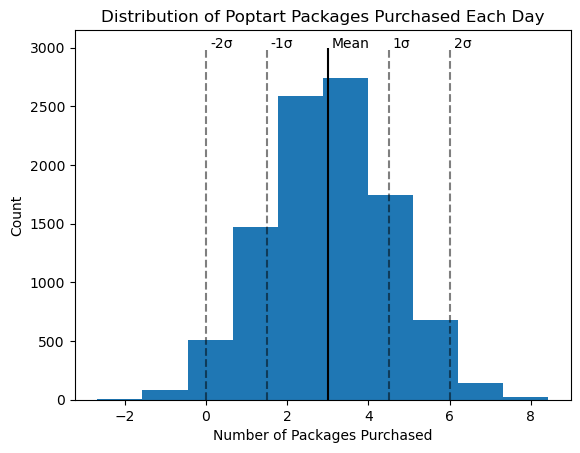

In [24]:
#Histogram
plt.hist(np.random.normal(3, 1.5, size = (10000),))
plt.title('Distribution of Poptart Packages Purchased Each Day')
plt.vlines(3, 0, 3000, color='black')
plt.text(3.1, 3000, 'Mean')
plt.vlines(4.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(4.6, 3000, '1σ')
plt.vlines(6.0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(6.1, 3000, '2σ')
plt.vlines(1.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(1.6, 3000, '-1σ')
plt.vlines(0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(0.1, 3000, '-2σ')
plt.ylabel('Count')
plt.xlabel('Number of Packages Purchased')
plt.show()

In [25]:
#see what are chances are that poptarts are bought per week
poptarts_bought_per_week = poptarts_bought_day.sum(axis=1)

#call that variable
poptarts_bought_per_week

array([2999631.20068223, 3002851.67900732, 3000533.14539955,
       3000644.23870565, 3002040.96218001])

### 5. Compare Heights
- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.
- If a man and woman are chosen at random, P(woman taller than man)?

In [26]:
#men's average height in cm
men_avg = 178
#men's standard deviation in cm
men_std = 8

#women's average height in cm
women_avg = 170
#women's standard deviation in cm
women_std = 6

In [27]:
#men avg sim
men = np.random.normal(178, 8, size = n_simulations)
men

array([177.51498221, 187.39668162, 172.25698965, ..., 171.29008432,
       191.89993724, 191.36773774])

In [28]:
#women avg sim
women = np.random.normal(170, 6, size = n_simulations)
women

array([161.94206635, 174.03763825, 169.14952553, ..., 176.98688959,
       160.94429401, 171.67167793])

In [29]:
#probability that women are taller then men on average
(women > men).mean()

0.21196

<hr style="border:1.5px solid black">

### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails.
- What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?
- What is the probability that we observe an installation issue within the first 150 students that download anaconda?
- How likely is it that 450 students all download anaconda without an issue?

##### Let's break it down
- prob_fail = 1/250
- 50 students == 0 fails
- 100 students == 0 fails
- 150 students >= 1 fail
- 450 students == 0 fails

##### 50 installs with no issues

In [30]:
outcomes = ['S', 'F']

number_of_students = 50

In [31]:
downloads = np.random.random((n_simulations, number_of_students)) 
p = 1/250
downloads

array([[0.17995886, 0.90165261, 0.32672005, ..., 0.28890044, 0.19435392,
        0.36153457],
       [0.16113345, 0.95799405, 0.50568779, ..., 0.10211996, 0.51512226,
        0.11418939],
       [0.28105792, 0.18734989, 0.64289326, ..., 0.95435994, 0.96436237,
        0.52202548],
       ...,
       [0.50105764, 0.24826598, 0.06739943, ..., 0.19491809, 0.63657016,
        0.92751203],
       [0.1343135 , 0.41085713, 0.45562835, ..., 0.09760602, 0.17787045,
        0.47809364],
       [0.79238402, 0.96419329, 0.17637725, ..., 0.52763449, 0.05017927,
        0.52379889]])

In [32]:

failure = downloads < p

In [33]:
(downloads == 'S').sum(axis=1)

/var/folders/0f/gkm6knzn3fscjt7dxlgc9k5h0000gn/T/ipykernel_15481/606381197.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (downloads == 'S').sum(axis=1)


AttributeError: 'bool' object has no attribute 'sum'

In [ ]:
(failure.sum(axis=1) == 0).mean()

<hr style="border:0.5px solid black">

##### 100 installs

In [ ]:
outcomes = ['S', 'F']
number_of_students = 100

downloads = np.random.random((n_simulations, number_of_students)) 
p = 1/250
downloads
(downloads == 'S').sum(axis=1)
failure = downloads < p
(failure.sum(axis=1) == 0).mean()

<hr style="border:0.5px solid black">

##### 150 installs at least 1 fail

In [ ]:
outcomes = ['S', 'F'] 
n_students = 150

downloads = np.random.choice(outcomes, size=(n_simulations, n_students), 
                p = [249/250, 1/250])

((downloads == 'S').sum(axis=1) < n_students).mean()

<hr style="border:0.5px solid black">

##### 450 installs

In [ ]:
outcomes = ['S', 'F']
n_students = 450

downloads = np.random.choice(outcomes, size=(n_simulations, n_students), 
                p = [249/250, 1/250])

((downloads == 'S').sum(axis=1) == n_students).mean()

<hr style="border:1px solid black">

### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [ ]:
n_days = 3

In [ ]:
# 0 = no truck, 1 = truck shows up
trucks = np.random.choice([0, 1], size = (n_simulations, n_days), p = [0.3, 0.7])

#call the variable
trucks

##### probability that no truck shows up in 3 days

In [ ]:
#axis 1 is 0 (or no truck shows up)
(trucks.sum(axis = 1) == 0).mean()

##### How likely is it that a food truck will show up sometime this week

In [ ]:
#likelyhood that in axis 1 there is a 1 (or a truck DOES show up) one or more days
(trucks.sum(axis = 1) >= 1).mean()

<hr style="border:1px solid black">

### 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?


Let's break it down:
- 365 days in a year
- what's the probability of same birthday

#### 23 students in the class

In [ ]:
#number of days in a year
outcomes = range(0, 365) 

#number of students
n_students= 23 

In [ ]:
#using random choice to get the possible birthdays
birthdays= np.random.choice(outcomes, size=(n_simulations, n_students))

#call that variable
birthdays

In [ ]:
#turn it into a DF so it's easier to read
birthdays = pd.DataFrame(birthdays)

#call our new DF
birthdays.head()

In [ ]:
#what are the chances that on average we will have a unique birthday
(birthdays.nunique(axis=1) < 23).mean()

<hr style="border:0.5px solid black">

#### 20 students per class

In [ ]:
#number of days in a year
outcomes = range(0, 365) 

#number of students
n_students= 20 

In [ ]:
#let's see what the possibility of birhtdays is with 20 students
birthdays= np.random.choice(outcomes, size=(n_simulations, n_students))

#turn that into a DF
birthdays = pd.DataFrame(birthdays)

#call the DF
birthdays

In [ ]:
#get the probability
(birthdays.nunique(axis=1) = n_students).mean()

<hr style="border:0.5px solid black">

##### 40 students per class

In [ ]:
#number of days in a year
outcomes = range(0, 365) 

#number of students
n_students = 40

#let's see what the possibility of birhtdays is with 40 students
birthdays = np.random.choice(outcomes, size=(n_simulations, n_students))

#call the DF
birthdays = pd.DataFrame(birthdays)
birthdays

In [ ]:
#get the probability
(birthdays.nunique(axis=1) < n_students).mean()